<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Line-detecting-and-template-creating" data-toc-modified-id="1.-Line-detecting-and-template-creating-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Line detecting and template creating</a></span><ul class="toc-item"><li><span><a href="#1.1-Load-demo-source" data-toc-modified-id="1.1-Load-demo-source-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Load demo source</a></span></li><li><span><a href="#1.2-Using-Canny-for-edge-detecting" data-toc-modified-id="1.2-Using-Canny-for-edge-detecting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Using Canny for <em>edge detecting</em></a></span></li><li><span><a href="#1.3-Using-HoughLine-transform-to-detecting-strange-line" data-toc-modified-id="1.3-Using-HoughLine-transform-to-detecting-strange-line-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3 Using <em>HoughLine</em> transform to detecting strange line</a></span></li><li><span><a href="#1.4-Horizontal-and-vertical-line-classification" data-toc-modified-id="1.4-Horizontal-and-vertical-line-classification-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4 Horizontal and vertical line classification</a></span></li><li><span><a href="#1.5-Detecting-bounding-box-of-the-gameboard" data-toc-modified-id="1.5-Detecting-bounding-box-of-the-gameboard-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>1.5 Detecting bounding box of the gameboard</a></span></li><li><span><a href="#1.6-Finding-the-shape-of-the-gameboard" data-toc-modified-id="1.6-Finding-the-shape-of-the-gameboard-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>1.6 Finding the shape of the gameboard</a></span></li><li><span><a href="#1.7-Cropping-all-the-pokemons-from-the-gameboard" data-toc-modified-id="1.7-Cropping-all-the-pokemons-from-the-gameboard-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>1.7 Cropping all the pokemons from the gameboard</a></span></li><li><span><a href="#1.8-Detecting-whether-a-square-contains-a-pokemon" data-toc-modified-id="1.8-Detecting-whether-a-square-contains-a-pokemon-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>1.8 Detecting whether a square contains a pokemon</a></span></li><li><span><a href="#1.9-Using-template-matching-to-locate-bag-of-similar-Pokemon" data-toc-modified-id="1.9-Using-template-matching-to-locate-bag-of-similar-Pokemon-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>1.9 Using template matching to locate bag of similar Pokemon</a></span><ul class="toc-item"><li><span><a href="#Template-matching-and-visuallize-result-function" data-toc-modified-id="Template-matching-and-visuallize-result-function-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Template matching and visuallize result function</a></span></li></ul></li><li><span><a href="#1.10-Demo-simple-pokemon" data-toc-modified-id="1.10-Demo-simple-pokemon-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>1.10 Demo simple pokemon</a></span></li></ul></li><li><span><a href="#2.-Let's-play!" data-toc-modified-id="2.-Let's-play!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Let's play!</a></span><ul class="toc-item"><li><span><a href="#2.1-Build-a-logical-Pikachu-Board-from-an-image-of-Pokemon-Game" data-toc-modified-id="2.1-Build-a-logical-Pikachu-Board-from-an-image-of-Pokemon-Game-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Build a logical Pikachu Board from an image of Pokemon Game</a></span></li><li><span><a href="#2.2-Pikachu-Solver" data-toc-modified-id="2.2-Pikachu-Solver-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Pikachu Solver</a></span><ul class="toc-item"><li><span><a href="#Detect-and-find-path-between-2-matched-Pokemons" data-toc-modified-id="Detect-and-find-path-between-2-matched-Pokemons-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Detect and find path between 2 matched Pokemons</a></span></li></ul></li><li><span><a href="#2.3-Time-to-solve-Pikachu" data-toc-modified-id="2.3-Time-to-solve-Pikachu-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Time to solve Pikachu</a></span></li><li><span><a href="#3.-Now-we-can-visualize-the-Gameplay" data-toc-modified-id="3.-Now-we-can-visualize-the-Gameplay-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>3. Now we can visualize the Gameplay</a></span><ul class="toc-item"><li><span><a href="#First-we-need-to-initial-and-pre-process-something" data-toc-modified-id="First-we-need-to-initial-and-pre-process-something-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>First we need to initial and pre-process something</a></span></li><li><span><a href="#Visualize-the-Gameplay-using-Tkinter-and-Python" data-toc-modified-id="Visualize-the-Gameplay-using-Tkinter-and-Python-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Visualize the Gameplay using Tkinter and Python</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

## 1. Line detecting and template creating

Outcome of this process is detecting the box of every individual pokemon. Then it's possible to crop it and used it as template for template matching

### 1.1 Load demo source

In [3]:
img = cv2.imread("img/pikachu_board_5.png")

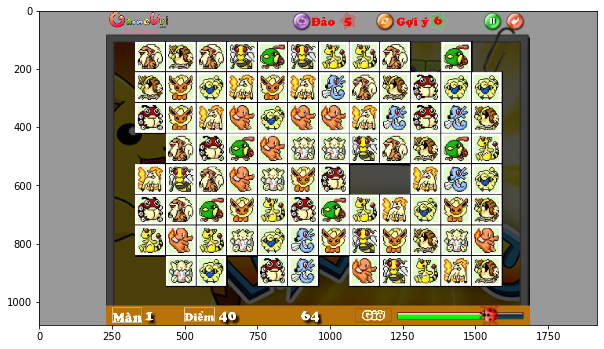

In [4]:
plt.imshow(img[:,:,::-1])

In [5]:
width = img.shape[0]
height = img.shape[1]
print(width, height)

1080 1920


At this point, 3 channels color is unnecessary because gray channel was contained all the information we may need.

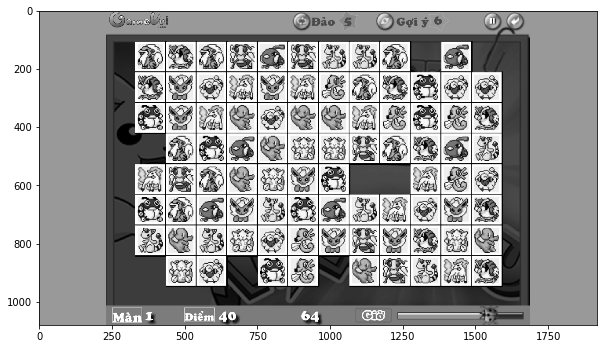

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = "gray")

### 1.2 Using Canny for *edge detecting*

`Canny(...)`

***Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])*** -> edges

*Note: For more detail about Canny, check in: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html*

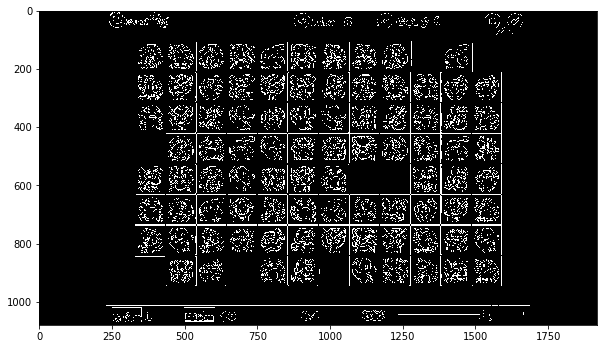

In [7]:
edge_detecting = cv2.Canny(gray_img, 200, 240, 30)
plt.imshow(edge_detecting, cmap='gray')

### 1.3 Using *HoughLine* transform to detecting strange line

`HoughLinesP(...)`

***HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])*** -> lines

*Note: For more detail about Canny, check in: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html?highlight=houghlinesp*

In [8]:
copy = img.copy()
linesP = cv2.HoughLinesP(edge_detecting, 1, np.pi/180, int(250 * img.shape[0]/329), None, int(50 * img.shape[0]/329), 15)

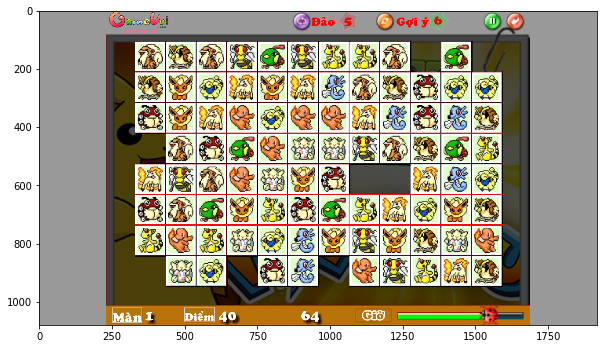

In [9]:
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
    plt.imshow(copy[...,::-1])

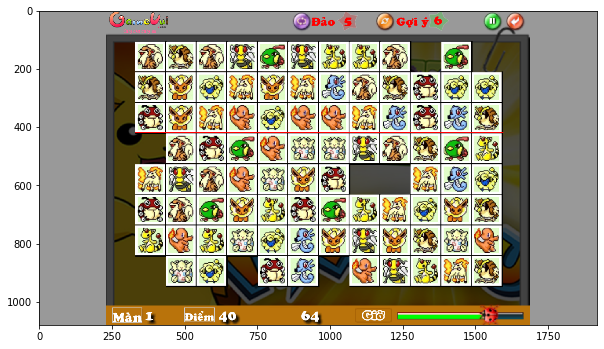

In [10]:
#demo selecting a random line
l = linesP[3][0]
copy = img.copy()
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
plt.imshow(copy[...,::-1])

### 1.4 Horizontal and vertical line classification

In [11]:
horizontal_lines = []
vertical_lines = []

for i in range(0, len(linesP)):
    l = linesP[i][0]
    if (l[0] == l[2]):
        vertical_lines.append(l)
    elif (l[1] == l[3]):
        horizontal_lines.append(l);

In [12]:
print(f"Number of horizontal lines: {len(horizontal_lines)}")
print(f"Number of vertical lines: {len(vertical_lines)}")

width = int(len(vertical_lines)/2)
height = int(len(horizontal_lines)/2)

Number of horizontal lines: 17
Number of vertical lines: 4


We see that all lines are either horizontal or vertical.

Now we will sort horizontal lines list and vertical lines list to create some order.

In [13]:
def hori(l):
    return l[1]
horizontal_lines.sort(key = hori)

def verti(l):
    return l[0]
vertical_lines.sort(key = verti)

### 1.5 Detecting bounding box of the gameboard

Duplicate lines and noises which are not parts of the gameboard should be removed!

In [14]:
def is_identical(line1, line2):
    for i in range(4):
        if abs(line1[i] - line2[i]) > 8:
            return False
    return True

In [15]:
gap_width = np.inf
x1_values = []
x2_values = []
tmp = horizontal_lines.copy()
if (len(tmp) <= 4):
    tmp = tmp[1:]
horizontal_lines = []
for line in tmp:
    for eps in range(-4, 5):
        x1_values.append(line[0] + eps)
        x2_values.append(line[2] + eps)
    
for line in tmp:
    flag1 = False
    flag2 = False
    for eps in range(-4, 5):
        if line[0] + eps == stats.mode(x1_values)[0]:
            flag1 = True
    for eps in range(-4, 5):
        if line[2] + eps == stats.mode(x2_values)[0]:
            flag2 = True
    if flag1 and flag2:
        if len(horizontal_lines) == 0 or not is_identical(line, horizontal_lines[-1]):
            horizontal_lines.append(line)
        else:
            gap_width = min(gap_width, line[1] - horizontal_lines[-1][1])
            
horizontal_lines

[array([ 331,  210, 1597,  210], dtype=int32),
 array([ 332,  313, 1597,  313], dtype=int32),
 array([ 331,  418, 1597,  418], dtype=int32),
 array([ 333,  631, 1597,  631], dtype=int32),
 array([ 331,  734, 1597,  734], dtype=int32),
 array([ 331,  839, 1591,  839], dtype=int32)]

In [16]:
y1_values = []
y2_values = []
tmp = vertical_lines.copy()
if (len(tmp) <= 4):
    tmp = tmp[1:]
vertical_lines = []
for line in tmp:
    for eps in range(-4, 5):
        y1_values.append(line[1] + eps)
        y2_values.append(line[3] + eps)
    
for line in tmp:
    flag1 = False
    flag2 = False
    for eps in range(-4, 5):
        if line[1] + eps == stats.mode(y1_values)[0]:
            flag1 = True
    for eps in range(-4, 5):
        if line[3] + eps == stats.mode(y2_values)[0]:
            flag2 = True
    if flag1 and flag2:
        if len(vertical_lines) == 0 or not is_identical(line, vertical_lines[-1]):
            vertical_lines.append(line)
        else:
            gap_width = min(gap_width, line[0] - vertical_lines[-1][0])
            
if gap_width == np.inf:
    gap_width = 0
vertical_lines

[array([436, 944, 436, 102], dtype=int32),
 array([644, 944, 644, 106], dtype=int32)]

The bounding box now can be found.

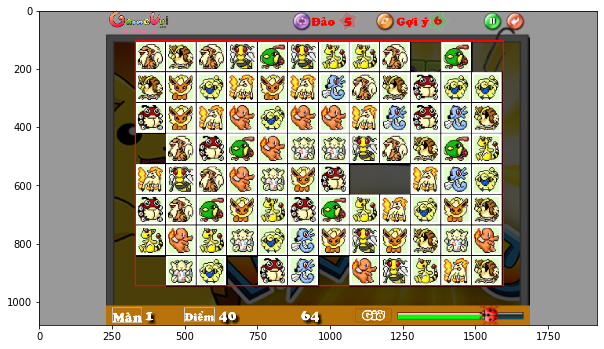

In [17]:
topleft = [horizontal_lines[0][0] if len(horizontal_lines) > 0 else stats.mode(x1_values)[0],
           vertical_lines[0][3] if len(vertical_lines) > 0 else stats.mode(y2_values)[0]]
bottomright = [horizontal_lines[0][2] if len(horizontal_lines) > 0 else stats.mode(x2_values)[0],
               vertical_lines[0][1] if len(vertical_lines) > 0 else stats.mode(y1_values)[0]]
topmost_line = [topleft[0], topleft[1], bottomright[0], topleft[1]]
leftmost_line = [topleft[0], bottomright[1], topleft[0], topleft[1]]
bottommost_line = [topleft[0], bottomright[1], bottomright[0], bottomright[1]]
rightmost_line = [bottomright[0], bottomright[1], bottomright[0], topleft[1]]

copy = img.copy()
l = topmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = leftmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = bottommost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = rightmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(copy[...,::-1])

### 1.6 Finding the shape of the gameboard

Add boundary lines to horizontal lines list and vertical lines list

In [18]:
if not is_identical(topmost_line, horizontal_lines[0]):
    horizontal_lines = [topmost_line] + horizontal_lines
    
if not is_identical(bottommost_line, horizontal_lines[-1]):
    horizontal_lines = horizontal_lines + [bottommost_line]
    
if not is_identical(leftmost_line, vertical_lines[0]):
    vertical_lines = [leftmost_line] + vertical_lines
    
if not is_identical(rightmost_line, vertical_lines[-1]):
    vertical_lines = vertical_lines + [rightmost_line]

The square size can be determined by the largest value that divides all gaps between parallel lines, and so can gameboard's shape as a result.

In [19]:
deltas = []
for i in range(0, len(horizontal_lines)):
    for j in range(i + 1, len(horizontal_lines)):
        if j < len(horizontal_lines) - 1:
            deltas.append(horizontal_lines[j][1] - horizontal_lines[i][1])
        else:
            deltas.append(horizontal_lines[j][1] - horizontal_lines[i][1] + gap_width)
        
for i in range(0, len(vertical_lines)):
    for j in range(i + 1, len(vertical_lines)):
        if j < len(vertical_lines) - 1:
            deltas.append(vertical_lines[j][1] - vertical_lines[i][1])
        else:
            deltas.append(vertical_lines[j][1] - vertical_lines[i][1] + gap_width)

In [20]:
def is_int(value):
    return abs(value - round(value)) < 0.15

In [21]:
for uss in range(bottomright[1] - topleft[1], 1, -1):
    flag = True
    for delta in deltas:
        if not is_int(delta / uss):
            flag = False
            break
    if flag:
        unit_square_size = uss
        break
        
print(unit_square_size)
width = round((bottomright[0] - topleft[0]) / unit_square_size)
height = round((bottomright[1] - topleft[1]) / unit_square_size)
unit_square_width = (bottomright[0] - topleft[0] - gap_width * (width - 1)) / width
unit_square_height = (bottomright[1] - topleft[1] - gap_width * (height - 1)) / height
print(width, height)

107
12 8


### 1.7 Cropping all the pokemons from the gameboard

Firstly, let's create template and put pokemons in a list!

In [22]:
pokemons = []
for index in range(height):
    pokemon = []
    for jndex in range(width):
        topleft_pokemon = (int(topleft[0] + (unit_square_width + gap_width) * jndex),
                           int(topleft[1] + (unit_square_height + gap_width) * index))
        bottomright_pokemon = (int(topleft_pokemon[0] + unit_square_width),
                               int(topleft_pokemon[1] + unit_square_height))
        pokemon.append((topleft_pokemon, bottomright_pokemon))
        
    pokemons.append(pokemon)

print(f"row: {len(pokemons)}, col: {len(pokemons[0])}")

row: 8, col: 12


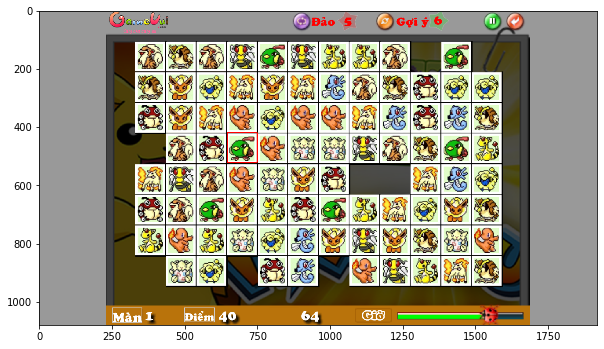

In [23]:
# Show a random pokemon
point_1 = pokemons[3][3][0]
point_2 = pokemons[3][3][1]
copy2 = img.copy()
cv2.rectangle(copy2, point_1, point_2, (0,0,255), 2, cv2.LINE_AA)
plt.imshow(copy2[...,::-1])

In [24]:
# We need to create a cropped images list for all pokemons
pokemon_imgs = []
padded_pokemon_imgs = []

for index in range(height):
    tmp = []
    for jndex in range(width):
        pokemon_img = img[pokemons[index][jndex][0][1]:pokemons[index][jndex][1][1], 
                          pokemons[index][jndex][0][0]:pokemons[index][jndex][1][0]]
        
        padded_pokemon_img = img[pokemons[index][jndex][0][1]-gap_width:pokemons[index][jndex][1][1]+gap_width, 
                                 pokemons[index][jndex][0][0]-gap_width:pokemons[index][jndex][1][0]+gap_width]
        
        pokemon_imgs.append(pokemon_img)
        tmp.append(padded_pokemon_img)
        
    padded_pokemon_imgs.append(tmp)

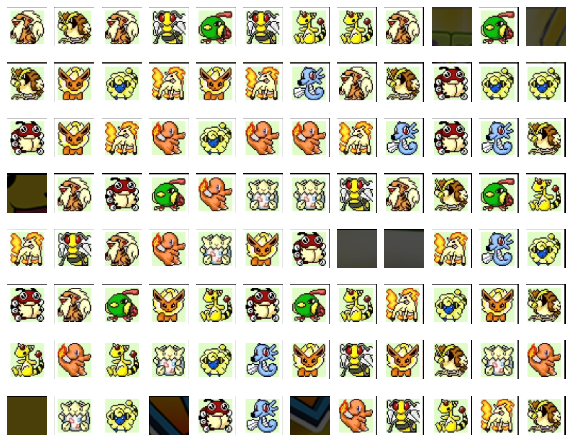

In [25]:
fig, ax = plt.subplots(height, width)
plt.rcParams['figure.figsize'] = [width, height]
for index in range(height):
    for jndex in range(width):
        top_left, bottom_right = pokemons[index][jndex][0],  pokemons[index][jndex][1]
        template = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        ax[index][jndex].axis('off')
        ax[index][jndex].imshow(template[:,:,::-1])

### 1.8 Detecting whether a square contains a pokemon

In [26]:
def is_pokemon(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return img[:, :, 2].mean() > 128

In [27]:
pokemon_checks = []
for index in range(height):
    tmp = []
    for jndex in range(width):
        tmp.append(is_pokemon(pokemon_imgs[index * width + jndex]))
        
    pokemon_checks.append(tmp)

pokemon_checks

[[True, True, True, True, True, True, True, True, True, False, True, False],
 [True, True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True, True],
 [False, True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, False, False, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True, True],
 [False, True, True, False, True, True, False, True, True, True, True, True]]

### 1.9 Using template matching to locate bag of similar Pokemon

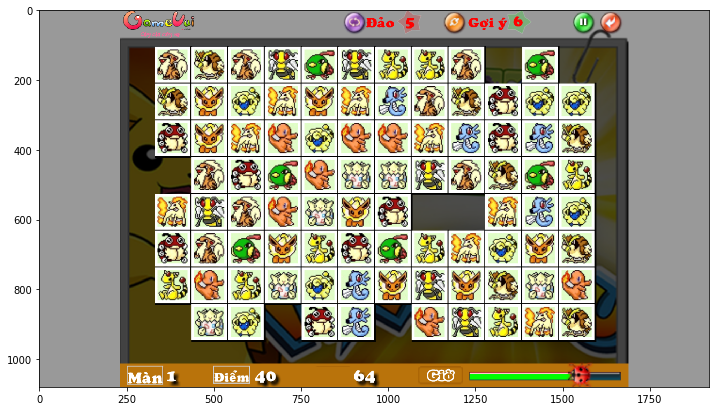

In [28]:
plt.imshow(img[:,:,::-1])

#### Template matching and visuallize result function

In [29]:
def detectingPokemon(img, template, meth="cv2.TM_CCOEFF_NORMED"):
    method = eval(meth)
    if len(img.shape) == 3:
        b, r, g = cv2.split(img)
        temp_b, temp_r, temp_g = cv2.split(template)
        
        res_b = cv2.matchTemplate(b, temp_b, method)
        res_r = cv2.matchTemplate(r, temp_r, method)
        res_g = cv2.matchTemplate(g, temp_g, method)
        res = np.add(res_b, res_r, res_g)
    else: 
        print("The input image have only gray channel")
        return
    
    return res

In [30]:
def display(i_origin, j_origin, verbo = False):
    template = pokemon_imgs[i_origin * width + j_origin]
    h, w, c = template.shape
    
    locs = []
    res = []
    for index in range(height):
        for jndex in range(width):
            if pokemon_checks[index][jndex]:
                res.append(np.max(detectingPokemon(padded_pokemon_imgs[index][jndex], template)))
            else:
                res.append(0)
    
    threshold = 0.7
    #selecting points which have value equal or bigger than max_val
    res = (res >= threshold*np.max(res))
    for index in range(height):
        for jndex in range(width):
            if res[index * width + jndex]:
                locs.append((index, jndex))
                
    #Every single Pokemon can be indentify if we have top_left point and bottom_left point.
    #This double loof return a list name "locs" which have might be the Pokemon we are looking for.
    
    #Todo: Later we need to find each Pokemon their siblings, that can be done with for all the Pokemon. Hmmm, it might takes a long time
    if verbo:
        print("Location of similar Pokemon: ", locs)

        img_copy = img.copy()

        #loop for every single one who have the same value as max point
        for loc in locs:
            top_left = pokemons[loc[0]][loc[1]][0]
            bottom_right = pokemons[loc[0]][loc[1]][1]
            cv2.rectangle(img_copy, top_left, bottom_right, (0, 255, 0), 2)

        cv2.rectangle(img_copy, pokemons[i_origin][j_origin][0], pokemons[i_origin][j_origin][1], (0, 0, 255), 2)
        plt.axis('off')
        plt.imshow(img_copy[:,:,::-1])
    
    return locs

### 1.10 Demo simple pokemon

I'm taking the first pokemon of the board which location in [0, 0]

'Cause we have cropped all the pokemon, so I just have to take the `top_left` and `bottom_right` of the its from `pokemons` to became its own template for template matching algorithm above

In this case, I'm using TM_CCORR with 3 channels color. Good result confirmed!

In [31]:
#demo with a random Pokemon

top_left, bottom_right = pokemons[0][3][0],  pokemons[0][3][1]
template = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

start_time = time.time()
demo_res = detectingPokemon(template, template)

print(f"Time for each template matching: {time.time()-start_time} s")

Time for each template matching: 0.002008676528930664 s


At function `detectingPokemon`, I've already create a list name `locs` contains all the position which have the value approximately equal to the max value

Location of similar Pokemon:  [(1, 1), (1, 4), (2, 1), (4, 5), (5, 3), (5, 10), (6, 6), (6, 8)]


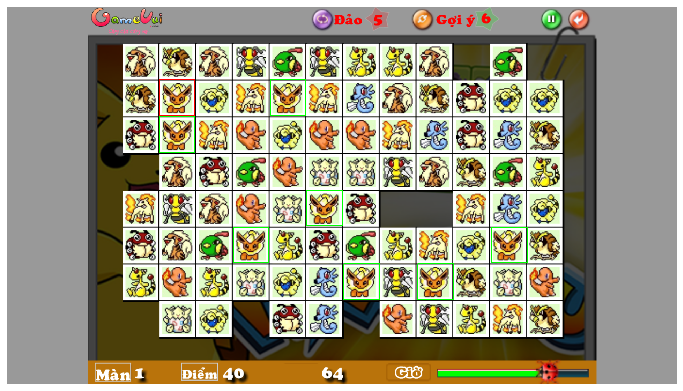

In [32]:
#display test result
#red box presents the current position, green boxs present all the same pokemon
similar_locs = display(1, 1, verbo = True)

## 2. Let's play!

### 2.1 Build a logical Pikachu Board from an image of Pokemon Game

In [33]:
#Initialize a list with size of Pikachu Board
pika_board = np.zeros((len(pokemons), len(pokemons[0])), dtype = 'int32')

In [34]:
# edit
pika_board.shape

(8, 12)

In [35]:
#Indexing similar pokemons with the same number as the template

def idx_similar_pokemon(positions, index, pika_board):
    for position in positions:
        pika_board[position[0], position[1]] = index

In [36]:
#Find pixel position of similar pokemon

def find_similar_pixPos(row_original, col_original):
    similar_locs = display(row_original, col_original, verbo = False)
    return similar_locs
    

In [37]:
index = 1

for row in range(len(pika_board)):
    for col in range(len(pika_board)):
        #check if there is a pokemon at the position
        if not pokemon_checks[row][col]:
            continue
        #check if the position has been indexed or not
        if (pika_board[row, col] != 0):
            continue
        #index the position
        pika_board[row, col] = index
        
        #find similar pokemon and index
        
        similar_locs = find_similar_pixPos(row, col)
        idx_similar_pokemon(similar_locs, index, pika_board)
        
        #update index
        index += 1

In [38]:
print(pika_board)

[[ 1  2  1  3  4  3  5  5  1  0  4  0]
 [ 2  6  7  8  6  8  9  1  2 10  7  7]
 [10  6  8 11  7 11 11  8  9 10  9  2]
 [ 0  1 10  4 11 12 12  3  1  2  4  5]
 [ 8  3  1 11 12  6 10  0  0  8  9  7]
 [10  1  4  6  5 10  4  5  8  7  6  2]
 [ 5 11  5 12  7  9  6  3  6  2 12 11]
 [ 0 12  7  0 10  9  0 11  3  5  8  2]]


In [39]:
# We need to save the origin board for further processing
origin_board = pika_board

In [40]:
# # Map logistic value to index of reference cropped image in pokemon_imgs array

# board_width = len(pokemons[0])
# board_height = len(pokemons)

# val2img = {}

# for x in range(board_height):
#     for y in range(board_width):
#         index = y + x*board_width
#         val2img[pika_board[x][y]] = index

# val2img[0] = 0

# val2img

In [41]:
# # Resize all cropped image to the same size
# crop_size = 37

# for i in val2img:
#     np.resize(pokemon_imgs[val2img[i]], (crop_size, crop_size, 3))

In [42]:
# for i in val2img:
#     print(pokemon_imgs[val2img[i]].shape)

### 2.2 Pikachu Solver

#### Detect and find path between 2 matched Pokemons

First we will pad the Pokemon board with zeros.

In [43]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

pika_board = np.pad(pika_board, 1, pad_with, padder=0)
pika_board

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  1,  3,  4,  3,  5,  5,  1,  0,  4,  0,  0],
       [ 0,  2,  6,  7,  8,  6,  8,  9,  1,  2, 10,  7,  7,  0],
       [ 0, 10,  6,  8, 11,  7, 11, 11,  8,  9, 10,  9,  2,  0],
       [ 0,  0,  1, 10,  4, 11, 12, 12,  3,  1,  2,  4,  5,  0],
       [ 0,  8,  3,  1, 11, 12,  6, 10,  0,  0,  8,  9,  7,  0],
       [ 0, 10,  1,  4,  6,  5, 10,  4,  5,  8,  7,  6,  2,  0],
       [ 0,  5, 11,  5, 12,  7,  9,  6,  3,  6,  2, 12, 11,  0],
       [ 0,  0, 12,  7,  0, 10,  9,  0, 11,  3,  5,  8,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [44]:
# Create a copy of padded origin board
origin_board_padded = pika_board.copy()
origin_board_padded

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  1,  3,  4,  3,  5,  5,  1,  0,  4,  0,  0],
       [ 0,  2,  6,  7,  8,  6,  8,  9,  1,  2, 10,  7,  7,  0],
       [ 0, 10,  6,  8, 11,  7, 11, 11,  8,  9, 10,  9,  2,  0],
       [ 0,  0,  1, 10,  4, 11, 12, 12,  3,  1,  2,  4,  5,  0],
       [ 0,  8,  3,  1, 11, 12,  6, 10,  0,  0,  8,  9,  7,  0],
       [ 0, 10,  1,  4,  6,  5, 10,  4,  5,  8,  7,  6,  2,  0],
       [ 0,  5, 11,  5, 12,  7,  9,  6,  3,  6,  2, 12, 11,  0],
       [ 0,  0, 12,  7,  0, 10,  9,  0, 11,  3,  5,  8,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Algorithm to detect and find path between Pokemons.

In [45]:
# bfs4 version 2

import collections
import numpy as np
import time


def bfs4(board):
    n = board.shape[0]
    m = board.shape[1]
    for i in range(1, n-1):
        for j in range(1, m-1):
            # check if pokemon or empty cell
            if board[i,j] > 0:
                answer = bfs4_cell(board, n, m, i, j)
                # if found a way to match 2 pokemons, return an array of tuples denoting the cells along the path
                if answer != -1:
                    return answer
    return -1


def bfs4_cell(board, n, m, sx, sy):
    limit_cost = 2
    infinity = 69
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    de = collections.deque([(sx, sy, 0), (sx, sy, 1), (sx, sy, 2), (sx, sy, 3)])
    d = np.full((n, m, 4), infinity, dtype=int)
    for i in range(4):
        d[sx,sy,i] = 0
    trace = np.zeros((n, m, 4, 3), dtype=int)
    visited = np.zeros((n, m, 4), dtype=bool)
    while de:
        cur = de.pop()
        if visited[cur[0],cur[1],cur[2]] == True:
            continue
        visited[cur[0],cur[1],cur[2]] = True
        # bfs in 4 directions
        for i in range(4):
            if (i+2)%4==cur[2]:
                continue
            next_x = cur[0] + dx[i]
            next_y = cur[1] + dy[i]
            # check if cell is outside the board or already visited
            if next_x < 0 or next_x >= n or next_y < 0 or next_y >= m or visited[next_x,next_y,i] == True:
                continue
            cost = d[cur[0],cur[1],cur[2]]
            change_direction = (cur[2] != i)
            # check if number of direction changes exceeds limit or gets worse
            if cost + change_direction > limit_cost or cost + change_direction >= d[next_x,next_y,i]:
                continue
            d[next_x,next_y,i] = cost + change_direction
            trace[next_x,next_y,i,:] = cur
            if board[next_x,next_y] == board[sx,sy]:
                # solution found
                answer = [(next_x, next_y)]
                cur_direction = i
                while next_x != sx or next_y != sy:   
                    prev_x, prev_y, prev_dir = trace[next_x,next_y,cur_direction]
                    answer.append((prev_x, prev_y))
                    next_x, next_y, cur_direction = prev_x, prev_y, prev_dir
                return answer[::-1]
            elif board[next_x,next_y] == 0:
                if change_direction == 0:
                    de.append((next_x, next_y, i))
                else:
                    de.appendleft((next_x, next_y, i))
    return -1

In [46]:
bfs4_cell(pika_board, pika_board.shape[0], pika_board.shape[1], 1, 4)

[(1, 4), (0, 4), (0, 5), (0, 6), (1, 6)]

### 2.3 Time to solve Pikachu

In [47]:
steps = []
states = []
pika_state = origin_board_padded.copy()
while(True):
#     states.append(pika_state)
    step = bfs4(pika_state)
    if step == -1:
        break
    steps.append(step)
    first_point = step[0]
    second_point = step[-1]
    pika_state[first_point[0], first_point[1]] = 0
    pika_state[second_point[0], second_point[1]] = 0
    new_state = pika_state.copy()
    states.append(new_state)
#     print(pika_state)
#     print()

In [48]:
for state in states:
    print(state)
    print()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  3  4  3  5  5  1  0  4  0  0]
 [ 0  2  6  7  8  6  8  9  1  2 10  7  7  0]
 [ 0 10  6  8 11  7 11 11  8  9 10  9  2  0]
 [ 0  0  1 10  4 11 12 12  3  1  2  4  5  0]
 [ 0  8  3  1 11 12  6 10  0  0  8  9  7  0]
 [ 0 10  1  4  6  5 10  4  5  8  7  6  2  0]
 [ 0  5 11  5 12  7  9  6  3  6  2 12 11  0]
 [ 0  0 12  7  0 10  9  0 11  3  5  8  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4  3  5  5  1  0  4  0  0]
 [ 0  0  6  7  8  6  8  9  1  2 10  7  7  0]
 [ 0 10  6  8 11  7 11 11  8  9 10  9  2  0]
 [ 0  0  1 10  4 11 12 12  3  1  2  4  5  0]
 [ 0  8  3  1 11 12  6 10  0  0  8  9  7  0]
 [ 0 10  1  4  6  5 10  4  5  8  7  6  2  0]
 [ 0  5 11  5 12  7  9  6  3  6  2 12 11  0]
 [ 0  0 12  7  0 10  9  0 11  3  5  8  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  5  5  1  0  4  0  0]
 [ 0  

### 3. Now we can visualize the Gameplay

#### First we need to initial and pre-process something

In [49]:
# Define size of board to make the code cleaner :D

board_width = len(pokemons[0])
board_height = len(pokemons)

board_height_padded = board_height + 2
board_width_padded = board_width + 2

print(board_width, board_height)
print(board_width_padded, board_height_padded)

12 8
14 10


In [50]:
# Since everthing above is relative
# We need to label every cropped images with an unique value in the logical board 
# Now let's map every value in the logical board to the index of reference cropped image in the cropped list

val2img = {}

for x in range(board_height):
    for y in range(board_width):
        index = y + x*board_width
        val2img[origin_board[x][y]] = index

# add value 0 to list
val2img[0] = 0

val2img

{1: 61,
 2: 95,
 3: 92,
 4: 66,
 5: 93,
 0: 0,
 6: 80,
 7: 86,
 8: 94,
 9: 89,
 10: 88,
 11: 91,
 12: 85}

In [51]:
# Resize all cropped image to the same size for further processing
crop_size = 37

for i in val2img:
    np.resize(pokemon_imgs[val2img[i]], (crop_size, crop_size, 3))
    
for i in val2img:
    print(pokemon_imgs[val2img[i]].shape)

(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)
(102, 102, 3)


#### Visualize the Gameplay using Tkinter and Python

In [52]:
from tkinter import *
import numpy as np
from PIL import Image, ImageTk
import time

# Init window
window = Tk()
# Set title
window.title("Pikachu")
# Set window size
window.geometry("544x396")
# Set window color
bg_color = "black"
window.configure(bg = bg_color) 

canvas_width = 100 + board_width * crop_size
canvas_height = 100 + board_height * crop_size

canvas = Canvas(window, width = canvas_width, height = canvas_height, bg = bg_color)
canvas.pack()

# Convert cropped imgs list to tkinter imgs list
pokemon_tk_imgs = []

for row in range(board_height):
    for col in range(board_width):
        index = val2img[origin_board[row][col]]
        tk_img = ImageTk.PhotoImage(image=Image.fromarray(pokemon_imgs[index][:,:,::-1]))
        pokemon_tk_imgs.append(tk_img)


# Find a path between 2 similar pokemons and return 4 core points
def findPath(path):
#     path = steps[0]
    keyPoints = [] 
    keyPoints.append(path[0])
    
    for i in range(1, len(path)-1):
        if path[i-1][0] != path[i+1][0] and path[i-1][1] != path[i+1][1]:
            keyPoints.append(path[i])
    keyPoints.append(path[-1])
    
    return keyPoints        
        
def draw_state(pika_state):
    for row in range(board_height_padded):
        for col in range(board_width_padded):
            if pika_state[row][col] > 0:
                index = col-1 + (row-1) * board_width
                canvas.create_image((col) * crop_size, (row) * crop_size, anchor=NW, image=pokemon_tk_imgs[index])
            else:
                canvas.create_rectangle((col) * crop_size, 
                                        (row) * crop_size, 
                                        (col) * crop_size + crop_size, 
                                        (row) * crop_size + crop_size,
                                        outline = bg_color, fill = "black")
#     print("draw state")

                
def draw_path(path):
    keyPoints = findPath(path)
    
    start_y = keyPoints[0][0]
    start_x = keyPoints[0][1]

    end_y = keyPoints[-1][0]
    end_x = keyPoints[-1][1]

    for i in range(len(keyPoints)-1):
        y1 = keyPoints[i][0]
        x1 = keyPoints[i][1]

        y2 = keyPoints[i+1][0]
        x2 = keyPoints[i+1][1]

        start_center_x = x1 * crop_size + int(crop_size/2)
        start_center_y = y1 * crop_size + int(crop_size/2)

        end_center_x = x2 * crop_size + int(crop_size/2)
        end_center_y = y2 * crop_size + int(crop_size/2)

        canvas.create_line(start_center_x, start_center_y, end_center_x, end_center_y,
                           width = 2, fill = "red")
#     print("draw path")


draw_state(origin_board_padded)
time.sleep(1)
for i in range(len(states)):
    draw_path(steps[i])
    time.sleep(0.5)
    window.update()
    draw_state(states[i])
    time.sleep(0.5)
    window.update()
    
window.mainloop()

TclError: invalid command name ".!canvas"